<a href="https://colab.research.google.com/github/sathvikgs/ML_PROJECT/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS :**
EXPLORATORY DATA ANALYSIS OR EDA IS THE FIRST AND FOREMOST OF ALL TASKS THAT A DATASET GOES THROUGH. IT LETS US UNDERSTAND THE DATA AND THUS HELPS US TO PREPARE IT FOR THE UPCOMING TASKS.

* **OBJECTIVE -** EXPLORING THE DATA , PERFORMING EDA AND MAKING IT READY FOR MODELLING 

## 1 - IMPORTING LIBRARIES AND DATASET AND CHECKING THE DATA

In [ ]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    #VISUALISATION
import seaborn as sns              #VISUALISATION 

In [ ]:
#IMPORTING THE DATASET
data=pd.read_csv("data.csv")

In [ ]:
#DISPLAYING THE 5 ROWS OF DATA
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#CHECKING THE DATATYPES OF DATA
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
#TO IDENTIFY THE TYPE OF DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
#CHECKING THE SHAPE OF DATA
data.shape

(11914, 16)

In [ ]:
#STATISTICAL SUMMARY OF DATA
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
#CHECKING FOR NULL VALUES IN DATA
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## 2 - REMOVING IRRELEVANT COLUMNS

In [ ]:
#DROPPING THE COLUMNS OF DATA
data=data.drop(columns=["Market Category","Engine Fuel Type", "Number of Doors","Popularity","Model","Year"],axis=1)

* THESE FEATURES DO NOT CONTRIBUTE TO THE PREDICTION OF THE PRICE.
* MARKET CATEGORY CAN BE REMOVED SINCE IT HAS MANY NULL VALUES.
* THE BRAND OF THE CAR IS IMPORTANT AND NOT THE MODEL.

In [ ]:
#DISPLAYING THE DATA AFTER REMOVING THE COLUMNS
data.head() 

,Make,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


## 3 - RENAMING THE COLUMNS

In [ ]:
#RENAMING THE COLUMNS
data=data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

In [ ]:
#DISPLAYING THE DATA AFTER RENAMING THE COLUMNS
data.head()

,Make,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


## 4 - DROPPING OF DUPLICATE ROWS AND MISSING/NULL VALUES

THE OBJECTIVE OF THIS PROJECT IS TO DO EDA AND ITS FINE TO DROP MISSING VALUES AND DUPLICATE ROWS SINCE ITS SMALL COMPARED TO THE ENTIRE DATASET

* **DUPLICATE ROWS**

In [ ]:
#NUMBER OF ROWS AND COLUMNS BEFORE
data.shape

(11914, 10)

In [ ]:
#GETTING KNOW HOW MANY DUPLICATE ROWS ARE PRESENT IN THE DATA
dup_rows=data[data.duplicated()]
print("Number of duplicated rows are:\n",dup_rows.shape)

Number of duplicated rows are:
 (1498, 10)


In [ ]:
#DROPPING DUPLICATED ROWS
data=data.drop_duplicates()
#NUMBER OF ROWS AND COLUMNS AFTER
data.shape

(10416, 10)

* **NULL VALUES**

In [ ]:
#GETTING TO KNOW HOW MANY NULL VALUES PRESENT
print(data.isnull().sum())

Make              0
HP               61
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Price             0
dtype: int64


In [ ]:
#DROPPING NULL VALUES FROM DATA
data=data.dropna()
#COUNTING THE NUMBER OF ROWS AFTER REMOVING THE DATA
data.count()

Make             10326
HP               10326
Cylinders        10326
Transmission     10326
Drive Mode       10326
Vehicle Size     10326
Vehicle Style    10326
MPG-H            10326
MPG-C            10326
Price            10326
dtype: int64

In [ ]:
#CHECKING WHETHER ALL NULL VALUES REMOVED OR NOT
print(data.isnull().sum())

Make             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
#NUMBER OF ROWS AND COLUMNS AFTER
data.shape

(10326, 10)

## 5 - OUTLIERS

AN OUTLIER IS A POINT OR SET OF POINTS THAT ARE DIFFERENT FROM OTHER POINTS WHICH ARE LOW AND HIGH. ITS OFTEN A GOOD IDEA TO DETECT THE OUTLIERS AND TO REMOVE THEM SINCE THEY RESULTS IN LESS ACCURACY OF THE MODEL.

* **DETECTION OF OUTLIERS**

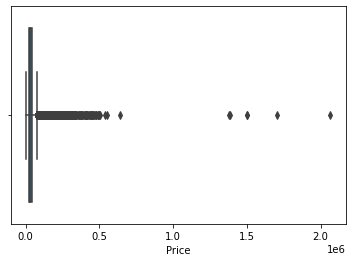

In [ ]:
sns.boxplot(x=data['Price'])

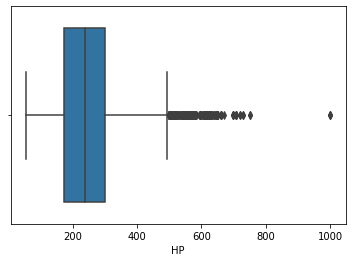

In [ ]:
sns.boxplot(x=data['HP'])

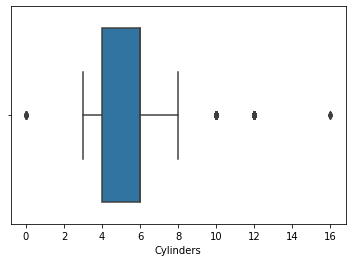

In [ ]:
sns.boxplot(x=data['Cylinders'])

THE POINTS OUTSIDE OF THE BOX POTS ARE ALL OUTLIERS

* **REMOVAL OF OUTLIERS**

In [ ]:
#USING INTERQUARTILE RANGE METHOD
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

HP             129.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        20975.0
dtype: float64


In [ ]:
#TO REMOVE THE OUTLIERS
data=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(9171, 10)

## 6 - MOST REPRESNTED CAR BRANDS

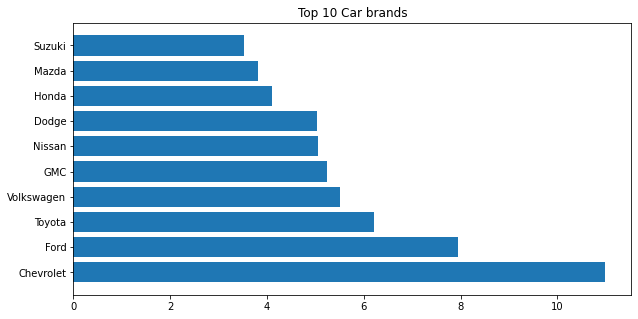

In [ ]:
# PERCENTAGE OF CAR PER BRAND
counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())
# TOP 10 CAR BRANDS
popular_labels = counts.index[:10]    
# PLOTTING THE GRAPH
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [ ]:
#TO FIND THE AVERAGE PRICE PRICE OF THE CARS
rate=data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print("THE AVERAGE PRICE OF THE TOP BRANDED CARS ARE :\n",rate)

THE AVERAGE PRICE OF THE TOP BRANDED CARS ARE :
                    Price
Make                    
Chevrolet   28238.587885
Dodge       22640.588745
Ford        27843.995879
GMC         32570.935417
Honda       27178.853723
Mazda       19901.719198
Nissan      26909.535637
Toyota      27522.103691
Volkswagen  28372.645545


## 7 - CORRELATION

In [ ]:
#CORRELATION MATRIX
data.corr()

,HP,Cylinders,MPG-H,MPG-C,Price
HP,1.000000,0.697729,-0.423702,-0.519429,0.741033
Cylinders,0.697729,1.000000,-0.703366,-0.751810,0.321756
MPG-H,-0.423702,-0.703366,1.000000,0.940995,-0.059940
MPG-C,-0.519429,-0.751810,0.940995,1.000000,-0.131613
Price,0.741033,0.321756,-0.059940,-0.131613,1.000000


* **FROM THE PLOT**
     * **HIGH CORRELATION :**
        ONE QUANTITY INCREASES, THE OTHER INCREASES AS WELL
        * CYLINDERS & HP  [WHEN NUMBER OF CYLINDERS INCREASES HORSE POWER INCREASES]
        * MPG-H & MPG-C
     * **LOW CORRELATION :**
         ONE QUANTITY INCREASES, THE OTHER QUANTITY DECREASES
         * CYLINDERS & MPG-H
         * CYLINDERS & MPG-C   

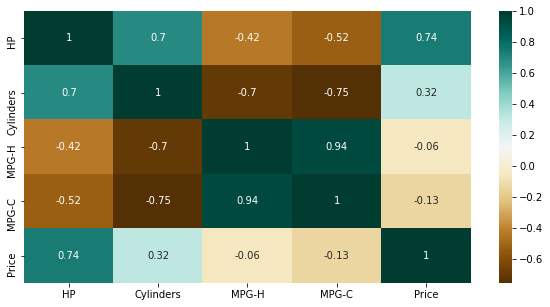

In [ ]:
#PLOTING THE MATRIX
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

## 8 - EDA PERFORMANCE AND GRAPHS

* HISTOGRAMS REFERS TO THE FREQUENCY OF OCCURRENCE OF VARIABLES IN AN INETRVAL.

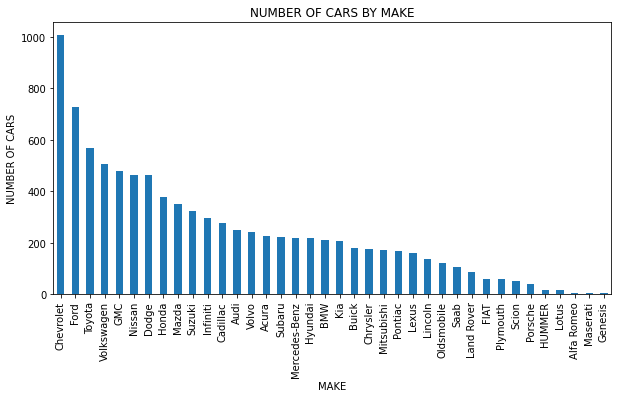

In [ ]:
#PLOTTING HISTOGRAM
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("NUMBER OF CARS BY MAKE")
plt.ylabel('NUMBER OF CARS')
plt.xlabel('MAKE');

* HERE WE CAN SEE THAT CHEVROLET MADE THE MOST SELLINGS COMPARED TO OTHER COMPANIES CARS 

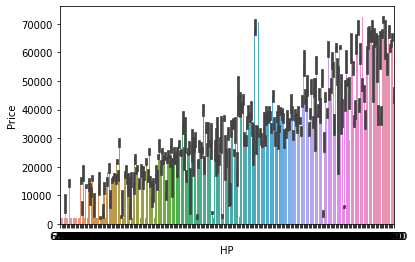

In [ ]:
#PLOTTING BAR GRAPH
sns.barplot(data['HP'],data['Price'])

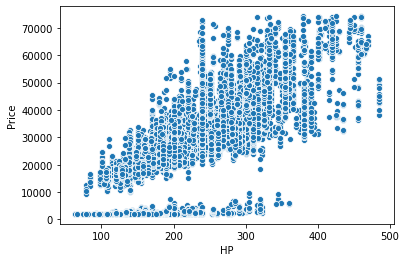

In [ ]:
#PLOTTING SCATTER GRAPH
sns.scatterplot(data['HP'],data['Price'])

* HERE WE CAN SEE THAT AS HP INCREASES PRICE INCREASES

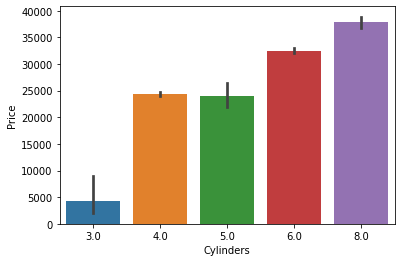

In [ ]:
#PLOTTING BAR GARPH
sns.barplot(data['Cylinders'],data['Price'])

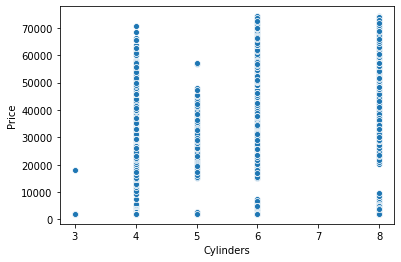

In [ ]:
#PLOTTING SCATTER GRAPH
sns.scatterplot(data['Cylinders'],data['Price'])

* HERE WE CAN SEE THAT AS NUMBER OF CYLINDERS INCREASES PRICE INCREASES
* SINCE HP AND NUMBER OF CYLINDERS ARE HIGH CORRELATED, HENCE PRICE IS AFFECTED WITH RESPECT TO THEIR CHANGE 

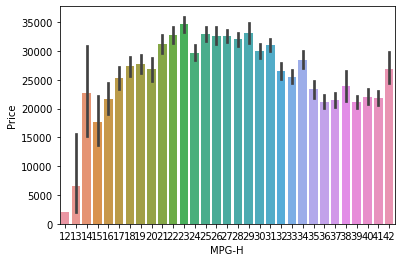

In [ ]:
#PLOTTING BAR GRAPH
sns.barplot(data['MPG-H'],data['Price'])

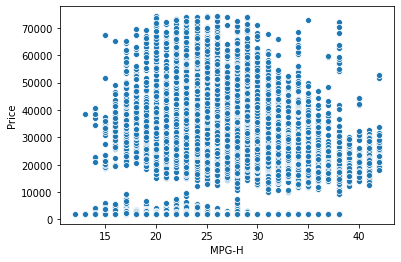

In [ ]:
#PLOTTING SCATTER GRAPH
sns.scatterplot(data['MPG-H'],data['Price'])

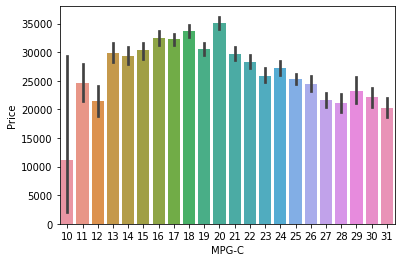

In [ ]:
#PLOTTING BAR GRAPH
sns.barplot(data['MPG-C'],data['Price'])

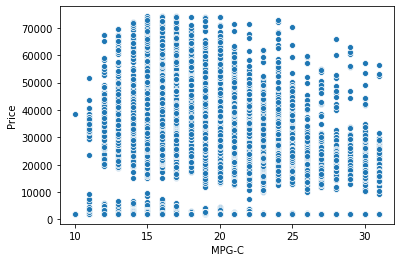

In [ ]:
#PLOTTING SCATTER GRAPH
sns.scatterplot(data['MPG-C'],data['Price'])

* FROM MPG-H&G WITH PRICE, WE GET TO KNOW THAT AS MPG INCREASES PRICE INCREASES AND LATER IT DECREASES. 
* SINCE MPG AND NUMBER OF CYLINDERS ARE VERY LOW CORRELATED, INCREASING IN CYLINDERS DECREASES MPG AND THE PRICE GETS DECREASED.

## 9 - SPLITTING AND GENERATING THE SCORE OF THE MODEL

* LABEL ENCODING REFERS TO CONVERTING THE LABELS INTO NUMERIC FORM SO AS TO CONVERT IT INTO THE MACHINE READABLE FORM.
* MACHINE LEARNING ALGORITHMS CAN THEN DECIDE IN A BETTER WAY ON HOW THOSE LABELS MUST BE OPERATED.

* **ENCODING THE DATA**

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
enc=LabelEncoder()
d=data.select_dtypes(exclude=[np.number]).columns
for i in d:
  data[i]=enc.fit_transform(data[i])
print('THE LABEL ENCODED DATA IS:\n')
data.head()  

THE LABEL ENCODED DATA IS:



,Make,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,3,335.0,6.0,2,3,0,8,26,19,46135
1,3,300.0,6.0,2,3,0,6,28,19,40650
2,3,300.0,6.0,2,3,0,8,28,20,36350
3,3,230.0,6.0,2,3,0,8,28,18,29450
4,3,230.0,6.0,2,3,0,6,28,18,34500


* **SPLITTING THE DATA**

SPLITTING THE DATA IN THE RATIO 80:20 WHERE;
  * 80% --> TRAINING SET
  * 20% --> TESTING SET

* USING RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y=data.iloc[:,8]     
X=data.iloc[:,0:8]    #PRICE IS THE TARGET VARIABLE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
#ACCURACY OF THE MODEL
print("THE MODEL SCORE OF THE MODEL IS :\n",model.score(X_test,y_test))

THE MODEL SCORE OF THE MODEL IS :
 0.9867151998797598


THE MODEL SCORE OF THE MODEL USING RANDOM FOREST REGRESSION IS FOUND TO BE 0.9867 WHICH IS CLOSE TO 1

ONE MORE ADVANTAGE OF USING RANDOM FOREST IS THAT IT GIVES BETTER RESULT THAN OTHER ALGORITHMS.

* USING LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
y=data.iloc[:,8]
x=data.iloc[:,0:8]
x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,Y_train)
Y_pred=logistic_regression.predict(x_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",logistic_regression.score(x_test,Y_test))

THE MODEL SCORE OF THE MODEL IS :
 0.2103542234332425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* USING LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
yy=data.iloc[:,8]
xx=data.iloc[:,0:8]
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.2,random_state=0)

In [ ]:
linear_regression=LinearRegression()
linear_regression.fit(xx_train,yy_train)
yy_pred=linear_regression.predict(xx_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",linear_regression.score(xx_test,yy_test))

THE MODEL SCORE OF THE MODEL IS :
 0.9217010532718792


* USING KNEIGHBOR CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
yyy=data.iloc[:,8]
xxx=data.iloc[:,0:8]
xxx_train,xxx_test,yyy_train,yyy_test=train_test_split(xxx,yyy,test_size=0.2,random_state=0)

In [ ]:
classifier_knn=KNeighborsClassifier(n_neighbors=3)   
classifier_knn.fit(xxx_train,yyy_train)
yyy_pred=classifier_knn.predict(xxx_test)
print("THE MODEL SCORE OF THE MODEL IS :\n",classifier_knn.score(xxx_test,yyy_test))

THE MODEL SCORE OF THE MODEL IS :
 0.7787465940054495


* HENCE WE CAN SEE THAT RANDOM FOREST IS BETTER THAN OTHER ALGORITHMS FOR THIS PROJECT

RANDOM FOREST REGRESSION IS BETTER BECAUSE;
* IT HANDLES HIGH_DIMENSIONALITY VERY WELL SINCE IT TAKES SUBSETS OF DATA.
* IT IS EXTREMELY VERSATILE AND REQUIRES VERY LITTLE PREPROCESSING.
* IT IS GREAT AT AVOIDING OVERFITTING SINCE EACH DECISION TRESS HAS LOW BIAS.

## 10 - PERFORMANCE CHECK

* **MEAN OF THE MODEL**

In [ ]:
print("THE MEAN PRICE OF THE MODEL IS:\n",round(data['Price'].mean(),2))

THE MEAN PRICE OF THE MODEL IS:
 29656.22


* THE MEAN SQUARED ERROR (MSE) MEASURES THE AVERAGE OF THE SQUARES OF ERRORS - THAT IS, THE AVERAGE SQUARED DIFFERENCE BETWEEN THE ESTIMATED VALUES AND THE ACTUAL VALUES.

* ROOT MEAN SQUARED ERROR CORRESPONDS TO THE AVERAGE DIFFERENCE BETWEEN THE OBSERVED KNOWN VALUES OF THE OUTCOME AND THE PREDICTED VALUES BY THE MODEL.
* LOWER THE VALUE, BETTER THE MODEL

* R-SQUARED EVALUATES THE SCATTER OF THE DATA POINTS AROUND THE FITTED REGRESSION.
* ASLO CALLED COEFFICIENT OF DETERMINATION/MULTIPLE DETERMINATION.
* HIGHER THE VALUE REPRESENTS SMALLER DIFFERENCES BETWEEN THE OBSERVED DATA ABD THE FITTED VALUES.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

* **USING RANDOM FOREST REGRESSION**

In [ ]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(y_test, pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(y_test,pred))

THE MEAN SQUARED ERROR IS :
 0.23515058137846623
ROOT MEAN SQUARE ERROR IS :
 0.5175115362543838
R-SQUARED SCORE IS :
 0.9867151998797598


*  **USING LINEAR REGRESSION**

In [ ]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(yy_test,yy_pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(yy_test,yy_pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(yy_test,yy_pred))

THE MEAN SQUARED ERROR IS :
 0.9070058285811458
ROOT MEAN SQUARE ERROR IS :
 1.2525141681776024
R-SQUARED SCORE IS :
 0.9217010532718791


* **USING LOGISTIC REGRESSION**

In [ ]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(Y_test,Y_pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(Y_test,Y_pred))

THE MEAN SQUARED ERROR IS :
 1.9122615803814713
ROOT MEAN SQUARE ERROR IS :
 2.6075764688445733
R-SQUARED SCORE IS :
 0.6606368111542226


* **USING KNEIGHBOR CLASSIFIER**

In [ ]:
print("THE MEAN SQUARED ERROR IS :\n",metrics.mean_absolute_error(yyy_test,yyy_pred))
print("ROOT MEAN SQUARE ERROR IS :\n",np.sqrt(metrics.mean_squared_error(yyy_test,yyy_pred)))
print("R-SQUARED SCORE IS :\n",metrics.r2_score(yyy_test,yyy_pred))

THE MEAN SQUARED ERROR IS :
 0.35858310626703
ROOT MEAN SQUARE ERROR IS :
 0.9413307294645875
R-SQUARED SCORE IS :
 0.9557742610352461


RANDOMFOREST GIVES A BETTER PERFORMANCE OVER METRICS COMPARED TO OTHER ALGORITHMS